In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = torch.linspace(1,50,50).reshape(-1,1)

In [ ]:
x

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [ ]:
torch.manual_seed(71)
e = torch.randint(-8, 9, (50, 1),dtype=float)

In [ ]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]], dtype=torch.float64)

In [ ]:
# This is all just to create noise inside the linear regression model
y = 2*x + 1 + e

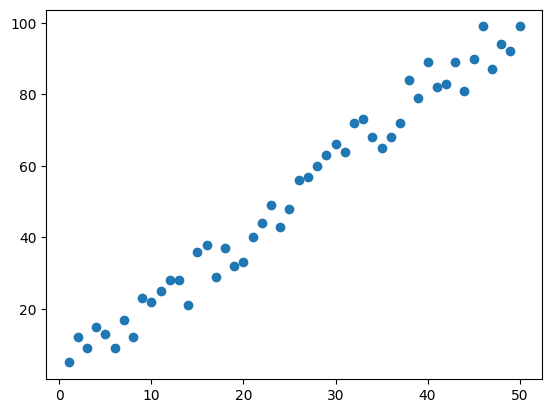

In [ ]:
plt.scatter(x , y)

In [ ]:
# Creating a class for model

class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()

        # Define your layers here
        self.linear = nn.Linear(in_features , out_features)

    def forward(self, x):
        # Define the forward pass of your model
        y_pred = self.linear(x)
        return y_pred


In [ ]:
torch.manual_seed(59)
# There is only 1 neuron for the input and 1 for the output
model = Model(1,1)

In [ ]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [ ]:
# To check the weights and biases for all the network
for name, param in model.named_parameters():
  print(name, '\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [ ]:
# Now lets forward pass a single value of x, note we haven't trained our model so it will give us poor result
random = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [ ]:
# Now lets forward pass multiple values of x
x1 = np.linspace(0.0,50.0,50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [ ]:
w1 = 0.10597
b1 = 0.9637
y1 = w1*x1 + b1

In [ ]:
#These are the predicted values of y1
y1

array([0.9637    , 1.07183265, 1.17996531, 1.28809796, 1.39623061,
       1.50436327, 1.61249592, 1.72062857, 1.82876122, 1.93689388,
       2.04502653, 2.15315918, 2.26129184, 2.36942449, 2.47755714,
       2.5856898 , 2.69382245, 2.8019551 , 2.91008776, 3.01822041,
       3.12635306, 3.23448571, 3.34261837, 3.45075102, 3.55888367,
       3.66701633, 3.77514898, 3.88328163, 3.99141429, 4.09954694,
       4.20767959, 4.31581224, 4.4239449 , 4.53207755, 4.6402102 ,
       4.74834286, 4.85647551, 4.96460816, 5.07274082, 5.18087347,
       5.28900612, 5.39713878, 5.50527143, 5.61340408, 5.72153673,
       5.82966939, 5.93780204, 6.04593469, 6.15406735, 6.2622    ])

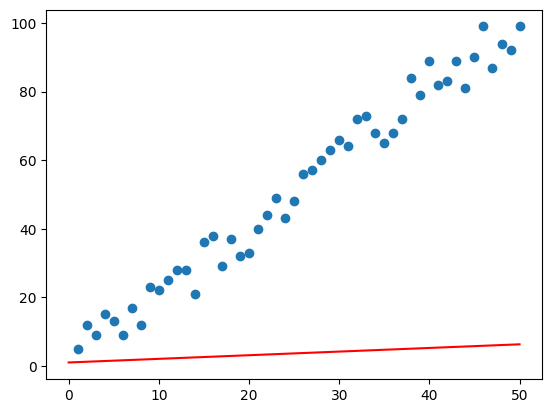

In [ ]:
#Now lets plot both of the values the predicted and the actual to see the difference
plt.scatter(x.numpy() , y.numpy())
plt.plot(x1,y1,'r')



As we can see there is big difference it is because our model is not trained yet

In [ ]:
# So now lets train our model
# First we will MSE to find the error between the predicted and the actual values
criterion = nn.MSELoss()


In [ ]:
# Now for gradient decent we will use stochastic gradient decent STD
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
epochs = 50
losses = []

for i in range(epochs):
    i = i + 1

    # Predicting on the forward pass
    y_pred = model.forward(x)

    # Calculating the loss
    loss = criterion(y_pred, y)

    # Recording the error
    losses.append(loss)

    # Accessing weights and biases using named_parameters
    for name, param in model.named_parameters():
        print(f"Parameter name: {name}, Value: {param.data.item()}")

    print(f"Epoch: {i}, Loss: {loss.item()}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Parameter name: linear.weight, Value: 0.10597813129425049
Parameter name: linear.bias, Value: 0.9637961387634277
Epoch: 1, Loss: 3057.2168645445636


RuntimeError: ignored

In [ ]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 50
losses = []

for epoch in range(epochs):
    # Predicting on the forward pass
    y_pred = model.forward(x)

    # Calculating the loss
    loss = criterion(y_pred, y)

    # Recording the error
    losses.append(loss.item())

    # Accessing weights and biases using named_parameters
    for name, param in model.named_parameters():
        print(f"Parameter name: {name}, Value: {param.data.item()}")

    print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Parameter name: linear.weight, Value: 0.10597813129425049
Parameter name: linear.bias, Value: 0.9637961387634277
Epoch: 1, Loss: 3057.2168645445636


RuntimeError: ignored